In [62]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# 데이터 프레임 생성
data_path = os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_reviews.json')
df = pd.read_json(data_path, encoding='utf-8')
df

,Cocktail,User,Review,Timestamp
0,1,Maarja,Sauermilch ist ja gar nicht so leicht zu bekom...,am 07.11.2022 um 19:08 Uhr
1,1,Katerchen,"Die Sauermilch lasse ich weg, nehme Joghurt st...",am 06.02.2022 um 11:41 Uhr
2,1,alpenkoch,Der frische Erdbeer-Sauermilchcocktail sieht a...,am 09.03.2021 um 13:22 Uhr
3,1,snakeeleven,Mit den letzten Erbeeren werde ich heute diese...,am 12.07.2019 um 09:52 Uhr
4,1,Silviatempelmayr,"Statt der sauermilch nehme ich Buttermilch, de...",am 13.07.2018 um 22:08 Uhr
...,...,...,...,...
2163,828,xblue,Der Absinth Maracuja Cocktail am Foto ist ein ...,am 08.02.2021 um 14:24 Uhr
2164,828,Heinrich45,Ganz böses Getränk. Trinkt sich wie eine Apfel...,am 08.01.2020 um 19:44 Uhr
2165,829,snakeeleven,"Cassandra das ist eine gute Idee von Dir, aber...",am 29.11.2019 um 13:54 Uhr
2166,829,Maisi,Durch die Farbe von Fanta und wahrscheinlich a...,am 25.04.2019 um 07:57 Uhr


In [73]:
users = list(set(df['User']))
print(len(users))
    

130


In [74]:
# Utility Matrix 생성
df['HasReview'] = 1
utility_matrix = df.pivot_table(index='Cocktail', columns='User', values='HasReview', aggfunc='count', fill_value=0)
utility_matrix
    

User,-michi-,AMMER,Andreawowa,Anna-111,Artelsmair,Babsi45,Billie-Blue,Cheesy,ChristineKlotz,ChuChu690,...,sgr1909,snakeeleven,spicy-orange,sssumsi,tamixpanda,tine13,verena_w,wald-sophie,wyoimi,xblue
Cocktail,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


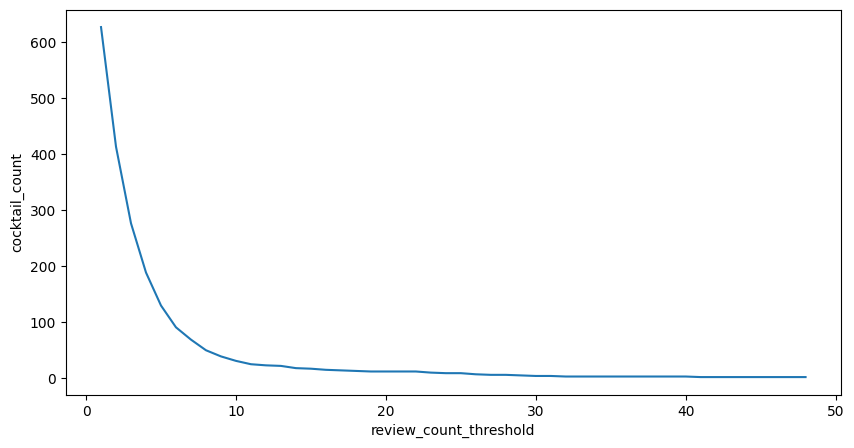

,리뷰 n개 이상,칵테일 수
0,1,627
1,2,413
2,3,276
3,4,188
4,5,129
5,6,90
6,7,68
7,8,49
8,9,38
9,10,30


In [128]:
review_count = utility_matrix.sum(axis=1)
review_count_threshold_list = []
review_count_list = []
# review_count 별 cocktail 개수
for review_count_threshold in range(1, max(review_count)+1):
    #print(review_count_threshold, review_count[review_count >= review_count_threshold].count())
    review_count_threshold_list.append(review_count_threshold)
    review_count_list.append(review_count[review_count >= review_count_threshold].count())

# review_count 별 cocktail 개수 그래프
plt.figure(figsize=(10, 5))
plt.plot(review_count_threshold_list, review_count_list)
plt.xlabel('review_count_threshold')
plt.ylabel('cocktail_count')
plt.show()

# review_count 별 cocktail 개수 테이블
review_count_df = pd.DataFrame({"리뷰 n개 이상":review_count_threshold_list, "칵테일 수":review_count_list}, index=None)
review_count_df


    

In [132]:
cocktail_review_count_list = range(1, 8)
user_review_count_list = range(1, 4)

# Review Count가 n 이상인 칵테일만 남기기
for review_count_threshold in cocktail_review_count_list:
    cocktail_list = review_count[review_count >= review_count_threshold].index
    review_list = df[df['Cocktail'].isin(cocktail_list)]['Review'] # Review가 n개 이상인 Cocktail List에 속하는 Review만 남기기
    user_list = utility_matrix[utility_matrix.index.isin(cocktail_list)].columns # Review가 n개 이상인 Cocktail List에 속하는 User만 남기기
    print("리뷰가 N개 이상 달린 칵테일 레시피 수 : N = ", review_count_threshold, ", 칵테일 = ", len(cocktail_list))
    # Leaved Review Count가 m 이상인 유저만 남기기
    for review_leaved_threshold in user_review_count_list:
        user_list = user_list[utility_matrix.loc[cocktail_list, user_list].sum(axis=0) >= review_leaved_threshold]
        print("    리뷰를 M개 이상 남긴 유저 수 : M = ", review_leaved_threshold, ", 유저 = ", len(user_list))
    


리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  1 , 칵테일 =  627
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  130
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  75
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  58
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  2 , 칵테일 =  413
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  129
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  75
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  57
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  3 , 칵테일 =  276
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  126
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  74
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  57
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  4 , 칵테일 =  188
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  125
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  74
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  55
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  5 , 칵테일 =  129
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  124
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  72
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  54
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  6 , 칵테일 =  90
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  121
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  70
    리뷰를 M개 

In [142]:
# 각 조건 별로 Coctail List 보기
review_count_threshold = 4  # 2-> 413, 3-> 276, 4-> 188
cocktail_list = review_count[review_count >= review_count_threshold].index

cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
cocktail_profiles = pd.DataFrame({'ID': [x['ID'] for x in cocktail_profiles], 
                                  'Name': [x['Name'] for x in cocktail_profiles],
                                  'AverageRating': [x['AverageRating'] for x in cocktail_profiles],
                                  'Description': [x['description'] for x in cocktail_profiles],
                                  'Ingredients': [x['Ingredients'] for x in cocktail_profiles],
                                  'Directions': [x['Directions'] for x in cocktail_profiles],
                                  'Keywords': [x['Keywords'] for x in cocktail_profiles],
                                  })
cocktail_profiles = cocktail_profiles[cocktail_profiles['ID'].isin(cocktail_list)]
cocktail_profiles

# JSON 파일로 저장
cocktail_profiles.to_json(os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_profiles_filtered_by_'+str(review_count_threshold)+'.json'), orient='records', force_ascii=False, indent=4)

## AllRecipe 전처리

In [170]:
# All Recipe Dataset에서 Cocktail List 추출

data_path = os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_reviews.json')
df = pd.read_json(data_path, encoding='utf-8')["cocktail_reviews"]

df = pd.DataFrame({ 'Cocktail': [x['Cocktail'] for x in df],
                    'Name': [x['Name'] for x in df],
                    'User': [x['User'] for x in df],
                    'Review': [x['Review'] for x in df],
                    'Rating': [x['Rating'] for x in df],
                    'Date': [x['Date'] for x in df],
})

df


,Cocktail,Name,User,Review,Rating,Date
0,1,Jamaican Rum Punch,Madaline Rose,this punch tastes good! i recommend it! there’...,5,11/25/2020
1,1,Jamaican Rum Punch,Wayne Wess,Pretty good. Added some pimento for more flavor,5,08/17/2020
2,1,Jamaican Rum Punch,JEM,Reminds me of a cousin to the Mai Tai. I also ...,5,05/28/2020
3,1,Jamaican Rum Punch,Jason Santiago,Added a pinch more of grenadine other than tha...,4,03/20/2020
4,1,Jamaican Rum Punch,Andrea Judd,Yumo! Made exactly except subbed regular Bacar...,5,06/01/2019
...,...,...,...,...,...,...
5690,59,Ultimate Frozen Strawberry Margarita,LYTHA,Ohhh yeah! I used frozen whole strawberries in...,4,05/02/2003
5691,59,Ultimate Frozen Strawberry Margarita,SOULFOODSARA,Just like the ones i've had in my favourite Me...,5,04/07/2003
5692,59,Ultimate Frozen Strawberry Margarita,ATOMICLUSH,"Very good strawberry margarita, however I cut ...",5,03/31/2003
5693,59,Ultimate Frozen Strawberry Margarita,Allrecipes Member,I've been searching for a good strawberry marg...,4,07/02/2001


In [171]:
# Dataset 살펴보기
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cocktail  5695 non-null   int64 
 1   Name      5695 non-null   object
 2   User      5695 non-null   object
 3   Review    5695 non-null   object
 4   Rating    5695 non-null   int64 
 5   Date      5695 non-null   object
dtypes: int64(2), object(4)
memory usage: 267.1+ KB


,Cocktail,Rating
count,5695.000000,5695.000000
mean,26.962950,4.724144
std,17.384064,0.668109
min,1.000000,1.000000
25%,11.000000,5.000000
50%,28.000000,5.000000
75%,40.000000,5.000000
max,59.000000,5.000000


In [173]:
# Cocktail 별 Review 개수 (AllRecipe에서 Review 수 == Rating 수)
df.groupby('Cocktail').count()['Review'].sort_values(ascending=False)


Cocktail
11    1310
28     737
40     526
3      501
24     324
59     308
58     236
32     167
55     138
25     135
48      95
27      89
38      85
29      81
52      78
22      77
12      66
2       64
36      62
33      52
7       50
31      47
46      42
34      37
44      33
10      32
18      29
53      29
9       25
21      24
56      24
54      24
6       21
13      20
41      16
50      16
1       14
47      14
15      12
20      10
51       9
57       8
43       7
23       7
42       6
8        4
26       3
30       1
Name: Review, dtype: int64

In [212]:
# utility_matrix 생성
utility_matrix = df.pivot_table(index='Cocktail', columns='User', values='Rating', aggfunc='count', fill_value=0)
utility_matrix

User,(ME),(R.H.P),*Sherri*,072705r,1010lisalynn,101TEDDYBEARS,1woman3mouths,3KIDS5,3babybeans,3boysmom,...,yogi5550,yogimiss,yummy,yumster,zekenzulu,zeniq,ziggychick,zita3,zzfiremanzz,~*~Tropical Spice~*~
Cocktail,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [224]:
# 리뷰가 n개 이상 달린 칵테일만 남기기
cocktail_review_count_list = range(1, 15)
user_review_count_list = range(1, 4)

for review_count_threshold in cocktail_review_count_list:
    cocktail_list = df.groupby('Cocktail').count()['Review'][df.groupby('Cocktail').count()['Review'] >= review_count_threshold].index
    user_list = utility_matrix[utility_matrix.index.isin(cocktail_list)].columns # Review가 n개 이상인 Cocktail List에 속하는 User만 남기기
    print("리뷰가 N개 이상 달린 칵테일 레시피 수 : N = ", review_count_threshold, ", 칵테일 = ", len(cocktail_list))
    
    # Leaved Review Count가 m 이상인 유저만 남기기
    for review_leaved_threshold in user_review_count_list:
        user_list = user_list[utility_matrix.loc[cocktail_list, user_list].sum(axis=0) >= review_leaved_threshold]
        print("    리뷰를 M개 이상 남긴 유저 수 : M = ", review_leaved_threshold, ", 유저 = ", len(user_list))


리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  8 , 칵테일 =  42
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4861
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  349
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  110
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  9 , 칵테일 =  41
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4853
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  349
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  110
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  10 , 칵테일 =  40
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4845
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  349
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  110
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  11 , 칵테일 =  39
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4837
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  348
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  110
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  12 , 칵테일 =  39
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4837
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  348
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  110
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  13 , 칵테일 =  38
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4829
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 = 

In [245]:
# 각 조건별로 Cocktail List 보기
review_count_threshold = 15  # 1-> 48, 10-> 40, 15-> 38
cocktail_list = df.groupby('Cocktail').count()['Review'][df.groupby('Cocktail').count()['Review'] >= review_count_threshold].index

cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
cocktail_profiles = pd.DataFrame({'ID': [x['ID'] for x in cocktail_profiles],
                                    'Name': [x['Name'] for x in cocktail_profiles],
                                    'AverageRating': [x['AverageRating'] for x in cocktail_profiles],
                                    #'Description': [x['Description'] for x in cocktail_profiles],
                                    'Ingredients': [x['Ingredients'] for x in cocktail_profiles],
                                    'Directions': [x['Directions'] for x in cocktail_profiles],
                                    #Keywords': [x['Keywords'] for x in cocktail_profiles],
                                })
cocktail_profiles = cocktail_profiles[cocktail_profiles['ID'].isin(cocktail_list)]
cocktail_profiles.reset_index(drop=True, inplace=True)
cocktail_profiles

# JSON 파일로 저장
cocktail_profiles.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_profiles_filtered_by_'+str(review_count_threshold)+'.json'), orient='records', force_ascii=False, indent=4)